### NASA IMAGE EXTRACTION

In [2]:
#Installation of nasapy api
!pip install nasapy

In [3]:
#Installation of gtts(Google To Text Speech)
!pip install gtts


Enter date in YYYY-MM-DD format e.g.`1996-01-01` (between 1996 and today): 2024-01-07
Validated date: 2024-01-07
Directory already exists!
Wait for a moment to display the image
Date image released: 2024-01-07


Title of the image: The Cat's Eye Nebula in Optical and X-ray


Description for the image: To some it looks like a cat's eye. To others, perhaps like a giant cosmic conch shell.  It is actually one of the brightest and most highly detailed planetary nebula known, composed of gas expelled in the brief yet glorious phase near the end of life of a Sun-like star. This nebula's dying central star may have produced the outer circular concentric shells by shrugging off outer layers in a series of regular convulsions. The formation of the beautiful, complex-yet-symmetric inner structures, however, is not well understood. The featured image is a composite of a digitally sharpened Hubble Space Telescope image with X-ray light captured by the orbiting Chandra Observatory.  The exquisite f

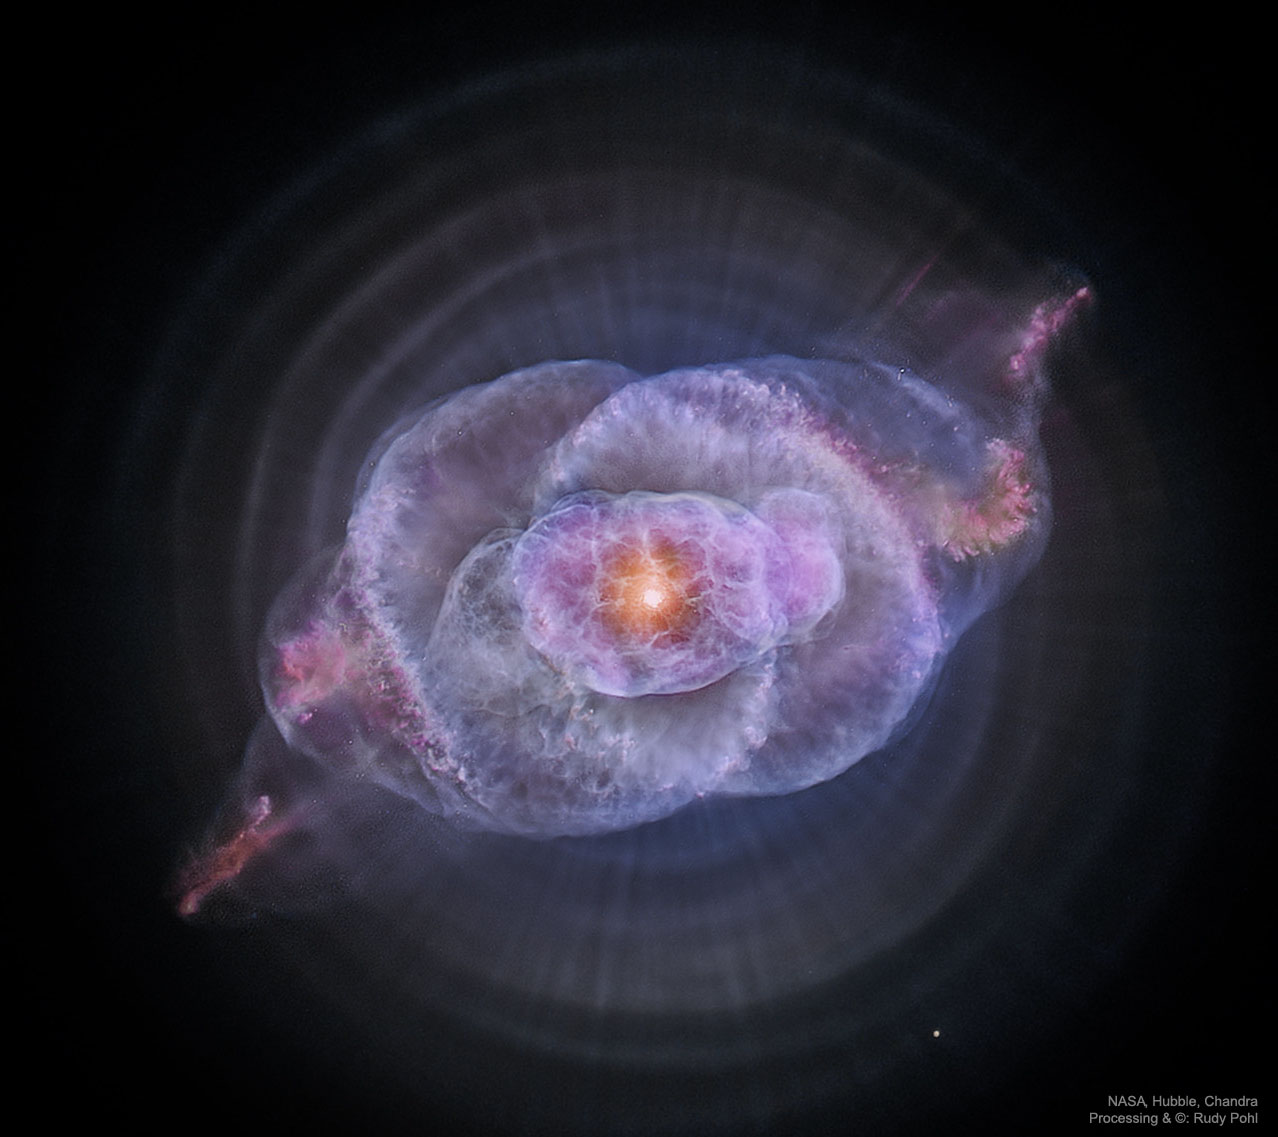



Type `a` and wait for a second to hear the audio explanation : a


In [9]:
#Import required libraries:
import nasapy
import os
from datetime import datetime
import urllib.request
from IPython.display import Image,display,Audio
from gtts import gTTS

from dotenv import load_dotenv

# Load variables from .env file into environment
load_dotenv()

# Get the API key from the environment variable
api_key = os.getenv("NASA_API_KEY")

# Check if the API key is available
if api_key is None:
    raise ValueError("NASA_API_KEY environment variable is not set")

# Initialize Nasa class by creating an object with the API key
nasa = nasapy.Nasa(key=api_key)

#from datetime import datetime

from datetime import datetime

def validate_date(date_str):
    try:
        # Validate date format
        datetime.strptime(date_str, '%Y-%m-%d')
        # Check if the date is between 1996 and today
        date = datetime.strptime(date_str, '%Y-%m-%d').date()
        today = datetime.now().date()
        if date >= datetime.strptime('1996-01-01', '%Y-%m-%d').date() and date <= today:
            return True
        else:
            return False
    except ValueError:
        return False

# Get validated date from user
while True:
    user_date = input("Enter date in YYYY-MM-DD format e.g.`1996-01-01` (between 1996 and today): ")
    if validate_date(user_date):
        break
    else:
        print("Invalid date or out of range. Please enter a date between 1996 and today.")

# Now user_date contains a validated date between 1996 and today
print("Validated date:", user_date)

#Get the image data:
apod = nasa.picture_of_the_day(date=user_date, hd=True)

#Check the media type available:
if(apod["media_type"] == "image"):
    
    #Displaying hd images only:
    if("hdurl" in apod.keys()):
 
        #Saving name for image:
        title = user_date + "_" + apod["title"].replace(" ","_").replace(":","_") + ".jpg"
   
        #Path of the directory:
        image_dir = "Astro_Images"

        #Checking if the directory already exists?
        dir_res = os.path.exists(image_dir)
 
        #If it doesn't exist then make a new directory:
        if (dir_res==False):
            os.makedirs(image_dir)

        #If it exist then print a statement:
        else:
            print("Directory already exists!\nWait for a moment to display the image")
        
        #Retrieving the image:
        urllib.request.urlretrieve(url = apod["hdurl"] , filename = os.path.join(image_dir,title))
        
        #Displaying information related to image:
        
        if("date" in apod.keys()):
            print(f'Date image released: {apod["date"]}')
            print("\n")
        if("copyright" in apod.keys()):
            print(f'This image is owned by: {apod["copyright"]}')
            print("\n")
        if("title" in apod.keys()):
            print(f'Title of the image: {apod["title"]}')
            print("\n")
        if("explanation" in apod.keys()):
            print(f'Description for the image: {apod["explanation"]}')
            print("\n")
        if("hdurl" in apod.keys()):
            print(f'URL for this image: {apod["hdurl"]}')
            print("\n")
        
  
        #Displaying main image:
        display(Image(os.path.join(image_dir,title)))

        #Text to Speech Conversion:
        #Take input from user:
        print("\n")
        choice = input("Type `a` and wait for a second to hear the audio explanation : ")
        
        if(choice=="a"):
            #Text to be converted:
            mytext = apod["explanation"]
 
            #Creating an object:
            myobj = gTTS(text=mytext, lang="en", slow=False) 
            
            #Generating audio file name:
            audio_title = user_date + "_" + apod["title"] + ".mp3"
            
            #Save the converted file:
            myobj.save(os.path.join(image_dir, audio_title)) 

            #Name of sound file:
            sound_file = os.path.join(image_dir, audio_title)

            # Playing the converted file 
            display(Audio(sound_file, autoplay=True))
            
 


#If media type is not image:
else:
    print("Sorry, Image not available!")